This is taken from the book: Michael Bowles, Machine Learning in Python, Wiley, 2015

Note :https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

Lets dig deeper in the functionality of decision trees using a self created dataframe

Lets say we have 2 experiments , where we investigate the correlation between them.

For example y=x

Alhtough in one of the experiments we have the introduction of noise:

y = x + random

Let now declare x to take values from -05 to + 0.5

In [1]:
import numpy as np

x = np.linspace(-.5, .5, 100)

In scikit-learn the data need to be in 2 dimensions (n_samples,n_features)

Hence the value of n_features =1

In [2]:
xs = x.reshape(x.shape[0], 1)
print(xs[:10])

[[-0.5       ]
 [-0.48989899]
 [-0.47979798]
 [-0.46969697]
 [-0.45959596]
 [-0.44949495]
 [-0.43939394]
 [-0.42929293]
 [-0.41919192]
 [-0.40909091]]


Lets now create the values for y

In [3]:
np.random.seed(1)
y = x + np.random.normal(loc=0, scale=0.1, size=x.shape[0])
print(y[:10])

[-0.33756546 -0.55107463 -0.53261516 -0.57699383 -0.3730552  -0.67964882
 -0.26491276 -0.50541362 -0.38728801 -0.43402795]


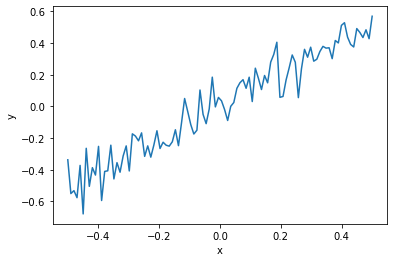

In [4]:
# Plotting a graph to visualise our data:

import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(x, y)
plt.xlabel('x')
_ = plt.ylabel('y')

Indeed at the begininng the correlation was meant to be linear but due to the introduction of noise we have a different representantion.

Since we have regression and we want to predict a numerical value we can use Decision Trees

In [5]:
from sklearn.tree import DecisionTreeRegressor

simple_tree = DecisionTreeRegressor(max_depth=1)
simple_tree.fit(xs, y)

DecisionTreeRegressor(max_depth=1)

The deapth of our treee is equal to 1

Meaning that it selects a value of x and divides it into 2

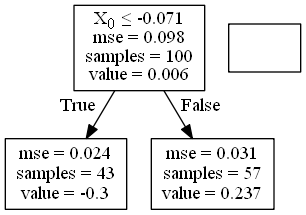

In [6]:
from io import StringIO
from sklearn import tree
import pydotplus
from IPython.display import Image  


dot_data = StringIO()  
tree.export_graphviz(simple_tree, out_file=dot_data,
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())  

The observed value of each sub division is represenented by 'Target Value'.

We can also use the initial graph and display a step function

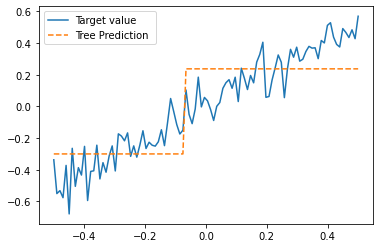

In [7]:
y_pred  = simple_tree.predict(xs)
plt.plot(x, y, label='Target value')
plt.plot(x, y_pred, label='Tree Prediction ', linestyle='--')
_ = plt.legend()

In [8]:
# Changing the depth of the tree to 2
simple_tree_2 = DecisionTreeRegressor(max_depth=2)
simple_tree_2.fit(xs, y)

DecisionTreeRegressor(max_depth=2)

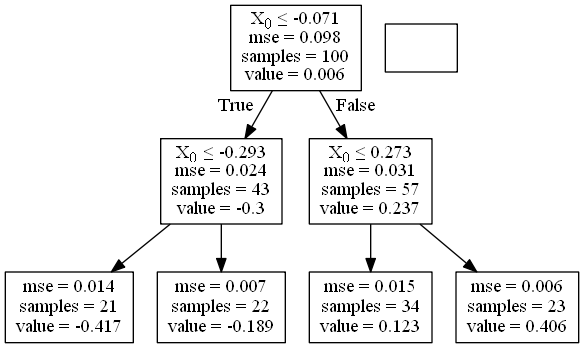

In [9]:
dot_data = StringIO()  
tree.export_graphviz(simple_tree_2, out_file=dot_data,
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())  

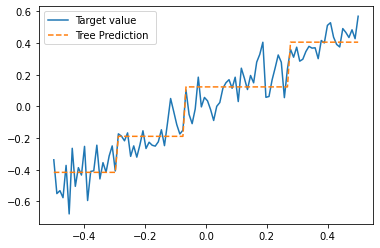

In [10]:
y_pred  = simple_tree_2.predict(xs)
plt.plot(x, y, label='Target value')
plt.plot(x, y_pred, label='Tree Prediction ', linestyle='--')
plt.legend()

We can see clearly that the results after increasing the deapth of tree are a lot better.

But what does that mean? Should we continue to increase the deapth of the tree continusly? What is the limit?



In [11]:
# Using GridSearchCV for calculating the max_deapth
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

parameters = [
  {'max_depth': list(range(1, 11))},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)

clf = clf.fit(xs, y)
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(max_depth=3)
{'max_depth': 3}


In [12]:
# Collect data inside a dataFrame
import pandas as pd

cv_results = pd.DataFrame(clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001197,3.989464e-04,0.001396,0.000488,1,{'max_depth': 1},0.607495,0.765537,0.681682,0.654618,0.641178,0.670102,0.053363,10
1,0.001397,4.879965e-04,0.001196,0.000398,2,{'max_depth': 2},0.821585,0.932724,0.806193,0.860453,0.817589,0.847709,0.046267,3
2,0.002393,2.491012e-03,0.001596,0.000799,3,{'max_depth': 3},0.896470,0.949902,0.760825,0.890455,0.911057,0.881742,0.063904,1
3,0.000998,3.693565e-07,0.001397,0.000489,4,{'max_depth': 4},0.871805,0.941957,0.753673,0.872550,0.911136,0.870224,0.063893,2
4,0.001396,4.885978e-04,0.002993,0.001668,5,{'max_depth': 5},0.830653,0.914181,0.630490,0.881906,0.872913,0.826029,0.101339,5
5,0.001396,4.915123e-04,0.000796,0.000398,6,{'max_depth': 6},0.830001,0.920180,0.640499,0.861733,0.889995,0.828481,0.098629,4
6,0.001396,4.885587e-04,0.002394,0.001493,7,{'max_depth': 7},0.828934,0.910372,0.629398,0.868159,0.881861,0.823745,0.100650,9
7,0.001197,7.466991e-04,0.001197,0.000400,8,{'max_depth': 8},0.843294,0.907984,0.622945,0.863543,0.884362,0.824426,0.103010,7
8,0.001396,4.889290e-04,0.001196,0.001933,9,{'max_depth': 9},0.837801,0.906764,0.622945,0.863176,0.890661,0.824269,0.103384,8
9,0.000998,9.368364e-07,0.000798,0.000399,10,{'max_depth': 10},0.843992,0.907173,0.622945,0.864144,0.890486,0.825748,0.103689,6


The sucessfulness is measured by R^2

The best result has a value of 1.0 and the worst case can also take negative values ( This cannot happen in linear regression )

A model whose predicting always the average value of y will have R^2 = 0

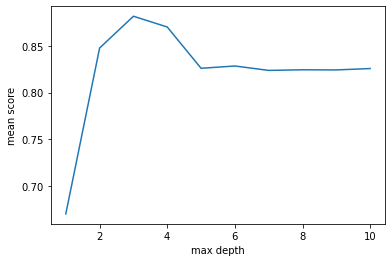

In [13]:
# Creating a graph for the test score
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'], label='True y')
plt.xlabel('max depth')
_ = plt.ylabel('mean score')

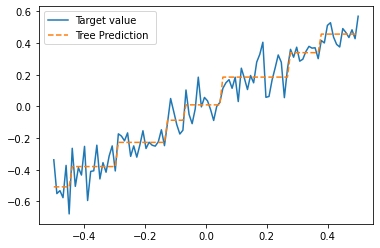

In [14]:
# For deapth 3
simple_tree_3 = DecisionTreeRegressor(max_depth=3)
simple_tree_3.fit(xs, y)
y_pred  = simple_tree_3.predict(xs)
plt.plot(x, y, label='Target value')
plt.plot(x, y_pred, label='Tree Prediction ', linestyle='--')
_ = plt.legend()

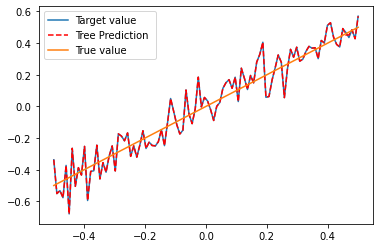

In [16]:
# For the max_deapth  = 10
simple_tree_10 = DecisionTreeRegressor(max_depth=10)
simple_tree_10.fit(xs, y)
y_pred  = simple_tree_10.predict(xs)
plt.plot(x, y, label='Target value')
plt.plot(x, y_pred, label='Tree Prediction ', linestyle='--', color='r')
plt.plot(x, x, label='True value')
_ = plt.legend()

We can see clearly that this graph is much better than the others

But is it?

We can see that the target value follows the tree prediction but this is NOT what we want.

We want to have a diagonal line representing y = x without the noise taken into consideration

Hence that is why max_deapth = 3 is much better rather that 10 (παπαγαλια)

In [17]:
y - y_pred

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.00285114, -0.00285114,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

With max-deapth = 10 we have also created a large tree

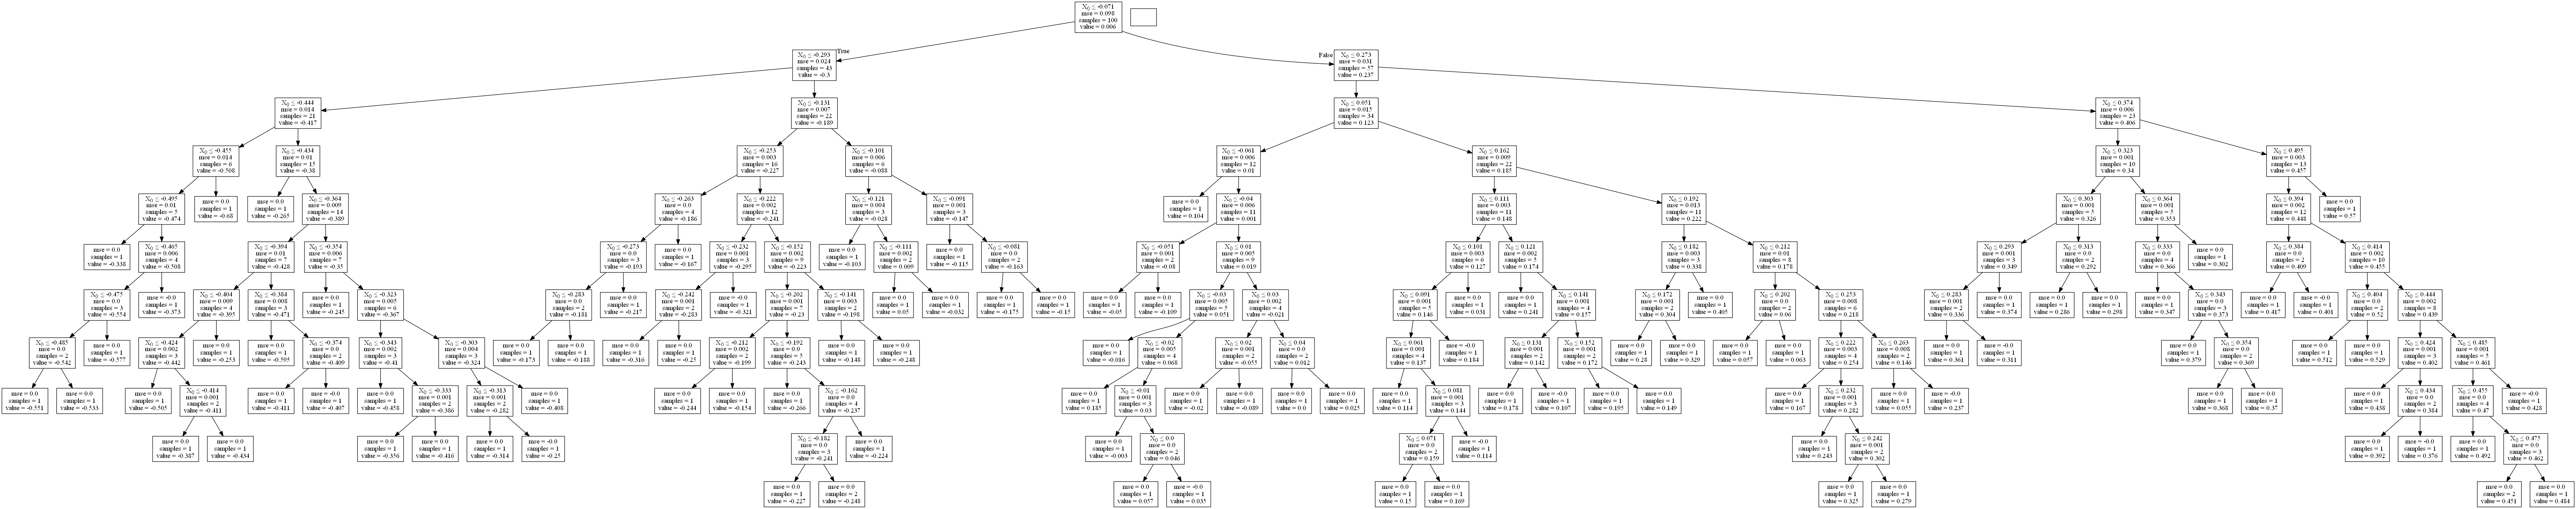

In [18]:
dot_data = StringIO()  
tree.export_graphviz(simple_tree_10, out_file=dot_data,
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())  

In [19]:
print(tree.export_text(simple_tree_10))

|--- feature_0 <= -0.07
|   |--- feature_0 <= -0.29
|   |   |--- feature_0 <= -0.44
|   |   |   |--- feature_0 <= -0.45
|   |   |   |   |--- feature_0 <= -0.49
|   |   |   |   |   |--- value: [-0.34]
|   |   |   |   |--- feature_0 >  -0.49
|   |   |   |   |   |--- feature_0 <= -0.46
|   |   |   |   |   |   |--- feature_0 <= -0.47
|   |   |   |   |   |   |   |--- feature_0 <= -0.48
|   |   |   |   |   |   |   |   |--- value: [-0.55]
|   |   |   |   |   |   |   |--- feature_0 >  -0.48
|   |   |   |   |   |   |   |   |--- value: [-0.53]
|   |   |   |   |   |   |--- feature_0 >  -0.47
|   |   |   |   |   |   |   |--- value: [-0.58]
|   |   |   |   |   |--- feature_0 >  -0.46
|   |   |   |   |   |   |--- value: [-0.37]
|   |   |   |--- feature_0 >  -0.45
|   |   |   |   |--- value: [-0.68]
|   |   |--- feature_0 >  -0.44
|   |   |   |--- feature_0 <= -0.43
|   |   |   |   |--- value: [-0.26]
|   |   |   |--- feature_0 >  -0.43
|   |   |   |   |--- feature_0 <= -0.36
|   |   |   |   |   |---

The tree has as many branches as our data --> it can only predict this values

In [20]:
simple_tree_10.get_n_leaves()

98

Lets see now in a more visually way what we can actually understand:

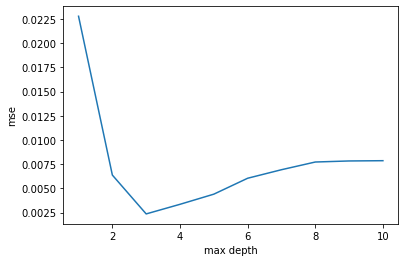

In [21]:
from sklearn.metrics import mean_squared_error

all_depths = []
all_mses = []
y_true = x

for max_depth in range(1, 11):
    all_depths.append(max_depth)
    simple_tree = DecisionTreeRegressor(max_depth=max_depth)
    simple_tree.fit(xs, y)
    y_pred  = simple_tree.predict(xs)
    mse = mean_squared_error(y_true, y_pred)
    all_mses.append(np.mean(mse))
    
plt.plot(all_depths, all_mses, label='True y')
plt.xlabel('max depth')
_ = plt.ylabel('mse')

We can see that at a max deapth of 2 the noise deacreases signifficantly but after that the line follows the data

This is a great example to show overfitting (a significant problem in machine learning)

Note:



    Διδακτική ιστορία: Το Πρόβλημα της Γρίπης της Google.

    Ginsberg, J., Mohebbi, M., Patel, R. et al. Detecting influenza epidemics using search engine query data. Nature 457, 1012–1014 (2009). https://doi.org/10.1038/nature07634.

    Lazer, D., R. Kennedy, G. King, and A. Vespignani. 2014. “The Parable of Google Flu: Traps in Big Data Analysis.” Science 343 (6176) (March 14): 1203–1205. http://nrs.harvard.edu/urn-3:HUL.InstRepos:12016836.
    
    This should have been a warning that the big data were overfitting the small number of cases—a standard concern in data analysis.


Summary:

Mention in the above cell is a story that showed the actuall effect of overfitting by Google

Hence as a teaching lesson there is not always a way to avoid overfitting

But we must always check our training data and our output data the way we did in this lessons

Not always the largest deapth is the better one as we have just seen